In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

from backtest import backtest_dca

In [2]:
start = "2023-01-01"
end = "2026-02-01"

symbols = {
    "BTC": "BTC-USD",
    "ETH": "ETH-USD",
    "BNB": "BNB-USD",
    "XRP": "XRP-USD",
    "SOL": "SOL-USD",
    "TRON": "TRX-USD",
    "ADA": "ADA-USD",
    "XMR": "XMR-USD",

    "LINK": "LINK-USD",
    "AVAX": "AVAX-USD",
    "DOT": "DOT-USD",
    "LTC": "LTC-USD"
}

initial_capital = 1.0
target_weights = None
threshold = 0.05
fee = 0.001   

In [3]:
# df = pd.DataFrame()
# for k, v in symbols.items():
#     df[k] = yf.download(v, start=start, end=end)["Close"]

# df.to_csv("prices.csv")

In [4]:
df_origin = pd.read_csv("prices.csv", index_col=0, parse_dates=True)
df_origin

,BTC,ETH,BNB,XRP,SOL,TRON,ADA,XMR,LINK,AVAX,DOT,LTC
Date,,,,,,,,,,,,
2023-01-01,16625.080078,1200.964844,244.136978,0.338763,9.982173,0.054820,0.249771,148.576935,5.622443,10.865915,4.370816,70.815659
2023-01-02,16688.470703,1214.656616,245.535904,0.348556,11.272967,0.055157,0.253828,147.943558,5.687627,11.153615,4.489374,74.862907
2023-01-03,16679.857422,1214.778809,246.133362,0.343824,13.344046,0.054833,0.252796,148.487930,5.622096,11.384450,4.524364,75.602722
2023-01-04,16863.238281,1256.526611,259.119690,0.347794,13.435113,0.054732,0.267677,150.743652,5.804032,12.077613,4.630191,75.433907
2023-01-05,16836.736328,1250.438599,256.422852,0.338039,13.419330,0.053661,0.269102,155.921738,5.647835,11.740196,4.617662,74.250809
...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-27,89102.570312,3022.210938,897.665527,1.913935,127.054794,0.294245,0.360304,469.657715,12.035913,12.118824,1.874989,69.964523
2026-01-28,89184.570312,3006.607422,901.348877,1.908726,125.118446,0.294984,0.357879,468.625854,11.832648,12.058091,1.867865,69.383377
2026-01-29,84561.585938,2818.232666,867.098145,1.805065,117.605766,0.294531,0.334010,459.148529,11.098450,11.025457,1.732650,66.103889


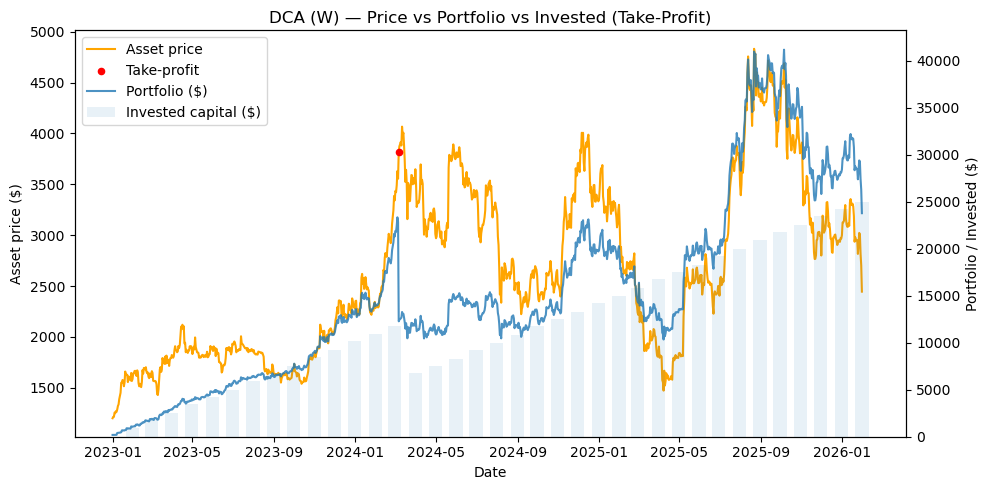

{'Cash_spent': 30961.538461538366,
 'Final_portfolio_value': 23777.06792551573,
 'Realized_profit': 6300.448677718344,
 'Total_equity': 30077.516603234075,
 'Num_take_profits': 1}

In [5]:
sol_prices = df_origin["ETH"]
invest_sum = 30000 / (52 * 3)

res, metric = backtest_dca(
    prices=sol_prices,
    buy_amount=invest_sum,
    freq="W",
    available_sum=1_000_000,
    fee=0.001,
    cooldown_days=180,
    plot=True
)

metric

In [6]:
res

,Portfolio,Invested,Realized_profit
2023-01-01,192.115385,192.307692,0.000000
2023-01-02,194.305624,192.307692,0.000000
2023-01-03,194.325171,192.307692,0.000000
2023-01-04,201.003464,192.307692,0.000000
2023-01-05,200.029579,192.307692,0.000000
...,...,...,...
2026-01-27,29389.209370,25000.000000,6300.448678
2026-01-28,29237.474432,25000.000000,6300.448678
2026-01-29,27405.641627,25000.000000,6300.448678
2026-01-30,26278.996896,25000.000000,6300.448678


# всі монети

In [7]:
df = df_origin[:"2025-09-01"].copy()
df

,BTC,ETH,BNB,XRP,SOL,TRON,ADA,XMR,LINK,AVAX,DOT,LTC
Date,,,,,,,,,,,,
2023-01-01,16625.080078,1200.964844,244.136978,0.338763,9.982173,0.054820,0.249771,148.576935,5.622443,10.865915,4.370816,70.815659
2023-01-02,16688.470703,1214.656616,245.535904,0.348556,11.272967,0.055157,0.253828,147.943558,5.687627,11.153615,4.489374,74.862907
2023-01-03,16679.857422,1214.778809,246.133362,0.343824,13.344046,0.054833,0.252796,148.487930,5.622096,11.384450,4.524364,75.602722
2023-01-04,16863.238281,1256.526611,259.119690,0.347794,13.435113,0.054732,0.267677,150.743652,5.804032,12.077613,4.630191,75.433907
2023-01-05,16836.736328,1250.438599,256.422852,0.338039,13.419330,0.053661,0.269102,155.921738,5.647835,11.740196,4.617662,74.250809
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-28,112544.804688,4507.177734,874.366028,2.967095,214.405640,0.344954,0.857750,266.599518,25.180487,24.890280,3.980491,113.758186
2025-08-29,108410.835938,4360.152832,863.276550,2.821957,205.220001,0.338837,0.827137,262.585785,23.433657,23.575598,3.776911,109.914024
2025-08-30,108808.070312,4374.153320,862.403992,2.818186,202.860138,0.339145,0.822405,258.764069,23.497807,23.786201,3.810158,110.810295


In [8]:
res = {}

selected_symbols = list(symbols)[:10]
total_investment = 30_000
individual_investment = total_investment / len(selected_symbols)

total_days = len(df)
total_days = total_days // 7

for symbol in selected_symbols:
    invest_sum = individual_investment / total_days

    prices = df[symbol]

    dca_result_one, dca_metrics_one = backtest_dca(
        prices=prices,
        buy_amount=invest_sum,
        freq="W",
        available_sum=1_000_000,
        fee=fee,
        cooldown_days=180,
        plot=False
    )

    res[symbol] = dca_metrics_one

In [9]:
results = pd.DataFrame(res).T

In [10]:
results.sort_values(by="Total_equity", ascending=False)

,Cash_spent,Final_portfolio_value,Realized_profit,Total_equity,Num_take_profits
XRP,3021.582734,3551.525957,3182.632353,6734.158310,2.0
SOL,3021.582734,1475.936086,3636.170605,5112.106691,5.0
ETH,3021.582734,4146.611355,707.100715,4853.712070,1.0
TRON,3021.582734,2676.482622,2122.698690,4799.181312,2.0
BNB,3021.582734,2214.908806,2055.486490,4270.395296,2.0
LINK,3021.582734,1455.185093,2498.444465,3953.629558,3.0
ADA,3021.582734,2529.210498,1385.833076,3915.043574,2.0
BTC,3021.582734,1613.128405,2237.261936,3850.390341,3.0
XMR,3021.582734,2429.520951,1335.133633,3764.654584,1.0
AVAX,3021.582734,1682.952509,1474.327560,3157.280069,2.0


In [11]:
results['Cash_spent'].sum(), results['Total_equity'].sum()

(30215.827338129602, 44410.55180518366)